In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [6]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB



import numpy as np
import matplotlib.pyplot as plt
from PIL import Image




RANDOM_STATE = 0 

In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# Pandas funcionando com arquivo local
f_senticnet = pd.read_csv(r"DS_MQD_Tested Senticnet23.csv", sep = "|", names = ['texto', 'Polarity SenticNet'])
f_senticnet.head()

,texto,Polarity SenticNet
0,"Oi querido diário, mais uma vez estou aqui me ...",-1
1,É maravilhoso saber que a cada dia estamos nos...,1
2,Na vida precisamos contar com o apoio daquela ...,1
3,Estou muito feliz e espero que você também.;,1
4,"Pra comemorar pedimos pizza, e eu fiz uma cart...",1


In [11]:
f_senticnet.columns

Index(['texto', 'Polarity SenticNet'], dtype='object')

In [12]:
f_senticnet2 = f_senticnet.reset_index()

In [14]:
# Pandas funcionando com arquivo local
f_mqd = pd.read_csv(r"https://raw.githubusercontent.com/LaCAfe/MQD-1465/main/MQD-1465.csv", names = ['texto', 'Polarity Judge', 'Juiz'])
f_mqd.head()

,texto,Polarity Judge,Juiz
36,"Oi querido diário, mais uma vez estou aqui me ...",-1,3
37,É maravilhoso saber que a cada dia estamos nos...,1,3
38,Na vida precisamos contar com o apoio daquela ...,0,3
39,Estou muito feliz e espero que você também.,1,3
40,"Pra comemorar pedimos pizza, e eu fiz uma cart...",1,3


In [16]:
f_mqd.columns

Index(['texto', 'Polarity Judge', 'Juiz'], dtype='object')

In [17]:
f_mqd2 = f_mqd.reset_index()

In [18]:
#Concatena dois dataframes em um terceiro, novo dataframe
f = pd.concat([f_mqd2, f_senticnet2], axis=1)


f

,index,texto,Polarity Judge,Juiz,index,texto,Polarity SenticNet
0,36,"Oi querido diário, mais uma vez estou aqui me ...",-1,3,0.0,"Oi querido diário, mais uma vez estou aqui me ...",-1.0
1,37,É maravilhoso saber que a cada dia estamos nos...,1,3,1.0,É maravilhoso saber que a cada dia estamos nos...,1.0
2,38,Na vida precisamos contar com o apoio daquela ...,0,3,2.0,Na vida precisamos contar com o apoio daquela ...,1.0
3,39,Estou muito feliz e espero que você também.,1,3,3.0,Estou muito feliz e espero que você também.;,1.0
4,40,"Pra comemorar pedimos pizza, e eu fiz uma cart...",1,3,4.0,"Pra comemorar pedimos pizza, e eu fiz uma cart...",1.0
...,...,...,...,...,...,...,...
1460,1531,Atualmente estou em um relacionamento homossex...,0,2,NaN,NaN,NaN
1461,1532,"Hoje iniciei o dia conversando com o Gabriel, ...",0,3,NaN,NaN,NaN
1462,1533,"Mas ele é lindo, aquele sorriso, a forma como ...",1,3,NaN,NaN,NaN
1463,1534,"Mandei um e-mail para o meu ""colega"" na quarta...",0,3,NaN,NaN,NaN


In [19]:
clean_f = f.drop("texto", axis=1) 

In [20]:
#clean_f=f.drop("texto", axis='columns')

In [21]:
f.dtypes

index                   int64
texto                  object
Polarity Judge          int64
Juiz                    int64
index                 float64
texto                  object
Polarity SenticNet    float64
dtype: object

In [22]:
polarity_judge = clean_f['Polarity Judge'].values
polarity_judge

array([-1,  1,  0, ...,  1,  0, -1])

In [23]:
polarity_senticnet = clean_f['Polarity SenticNet'].values
polarity_senticnet

array([-1.,  1.,  1., ..., nan, nan, nan])

In [24]:
def get_confusion_matrix(reais, preditos, labels):
#     """
#     Uma função que retorna a matriz de confusão para uma classificação binária
    
#     Args:
#         reais (list): lista de valores reais
#         preditos (list): lista de valores preditos pelo modelos
#         labels (list): lista de labels a serem avaliados.
#             É importante que ela esteja presente, pois usaremos ela para entender
#             quem é a classe positiva e quem é a classe negativa
    
#     Returns:
#         Um numpy.array, no formato:
#             numpy.array([
#                 [ tp, fp ],
#                 [ fn, tn ]
#             ])
#     """
    # não implementado
    if len(labels) > 2:
        return None

    if len(reais) != len(preditos):
        return None
    
    # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0
    
    # valores preditos incorretamente
    fp = 0
    fn = 0
    
    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0
    
    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
    ])

get_confusion_matrix(reais=polarity_judge, preditos=polarity_senticnet, labels=[1,0])
# array([[3, 1], [2, 4]])

array([[278, 232],
       [693, 262]])

In [25]:
confusion_matrix = pd.crosstab(clean_f['Polarity Judge'], clean_f['Polarity SenticNet'], rownames=['Actual'], colnames=['SenticNet'])
print (confusion_matrix)


SenticNet  -1.0   0.0   1.0
Actual                     
-1          254     5   285
 0          192     8   203
 1          223     6   278


In [26]:
import seaborn as sn

In [27]:
import matplotlib.pyplot as plt

SenticNet  -1.0   0.0   1.0
Actual                     
-1          254     5   285
 0          192     8   203
 1          223     6   278


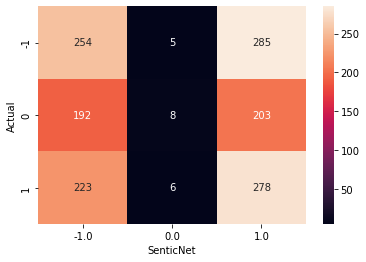

In [28]:
confusion_matrix = pd.crosstab(clean_f['Polarity Judge'], clean_f['Polarity SenticNet'], rownames=['Actual'], colnames=['SenticNet'])
print (confusion_matrix)
sn.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()

SenticNet  -1.0  0.0  1.0   All
Actual                         
-1          254    5  285   544
0           192    8  203   403
1           223    6  278   507
All         669   19  766  1454


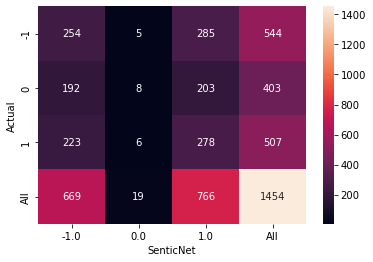

In [30]:
confusion_matrix = pd.crosstab(clean_f['Polarity Judge'], clean_f['Polarity SenticNet'], rownames=['Actual'], colnames=['SenticNet'], margins = True)
print (confusion_matrix)
sn.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()